# Seaborn (data visualiazation)

### First look at the Seaborn Library

In [16]:
import seaborn as sns # we involved seaborn library our project 

plnts = sns.load_dataset("Planets")
plnts.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [17]:
df = plnts.copy()

df.info() # get information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
import pandas as pd

df.method = pd.Categorical(df.method) # to change 'object' type with 'category' type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


### Description of the data set

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [9]:
# examining the missing value

df.isnull().values.any() # is there missing value?

True

In [10]:
df.isnull().sum() # alright, how many are missing in which variable? 

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
# to fill the missing values:

df['orbital_period'].fillna(0, inplace = True) # fill with zero 
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [12]:
df['mass'].fillna(df.mass.mean(), inplace=True) # fill with the average of the value
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df.fillna(df.mean(), inplace = True) # without enter value name
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

### Categorical variable summaries

In [17]:
cat_df = plnts.select_dtypes(include = ['object']) # involved categorical value to variable 
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [19]:
cat_df.method.unique() # 'unique' give value names

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [22]:
cat_df["method"].value_counts().count() # total value name

10

In [23]:
cat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

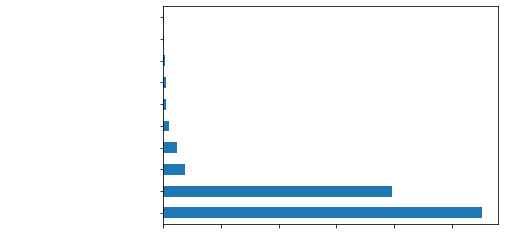

In [18]:
import matplotlib.pyplot as plt

df['method'].value_counts().plot.barh();
plt.xticks(color="white");
plt.yticks(color="white");

In [5]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [6]:
df_num['distance'].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [7]:
print(f"""
average: {str(df_num['distance'].mean())}
number of planets: {str(df_num['distance'].count())}
max value: {str(df_num['distance'].max())}""")


average: 264.06928217821786
number of planets: 808
max value: 8500.0


## Scatter Charts

### Barplot:

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

diamond = sns.load_dataset('diamonds')
df = diamond.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [12]:
from pandas.api.types import CategoricalDtype

df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [13]:
cut_category = ["Fair", 'Good', 'Very Good', 'Premium', 'Ideal']
df.cut.astype(CategoricalDtype(categories = cut_category, ordered = True))

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

### to create barplot charts

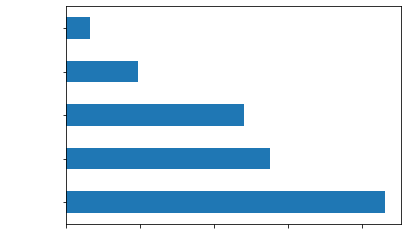

In [21]:
df['cut'].value_counts().plot.barh();4
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

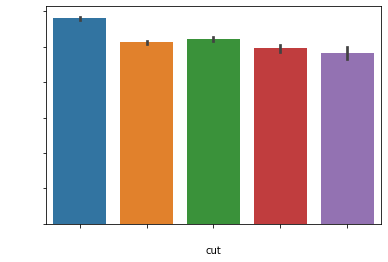

In [22]:
sns.barplot(x = 'cut', y = df.cut.index, data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

### Crossovers for charts

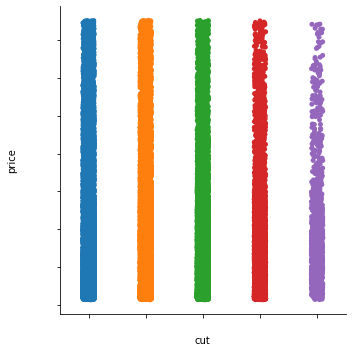

In [24]:
sns.catplot(x = 'cut', y = 'price', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

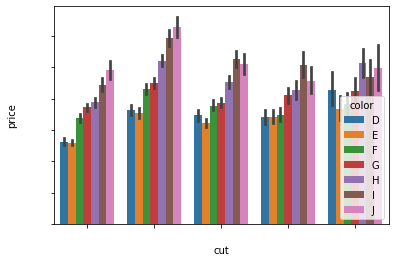

In [25]:
sns.barplot(x = 'cut', y = 'price', hue = 'color', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

In [26]:
grp = df.groupby(['cut', 'color'])['price'].mean()
print(grp)

cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

### Histogram and density

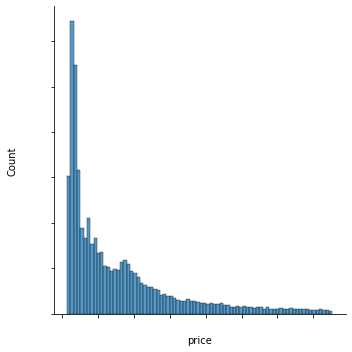

In [27]:
hist_data = sns.displot(df.price, kde = False)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show(); # kde value give density ration

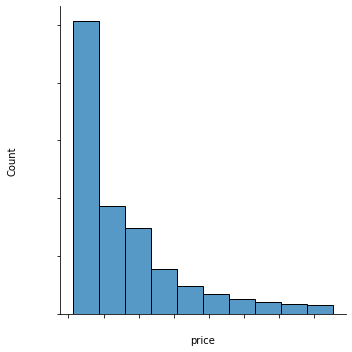

In [28]:
hist_data = sns.displot(df.price, bins = 10, kde = False)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show(); #bins value shows square area

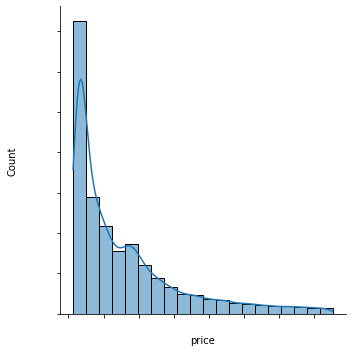

In [29]:
sns.displot(df.price, bins = 20, kde = True)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

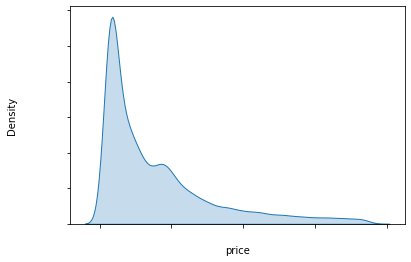

In [31]:
sns.kdeplot(df.price, shade = True)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

### Histogram density and crossovers

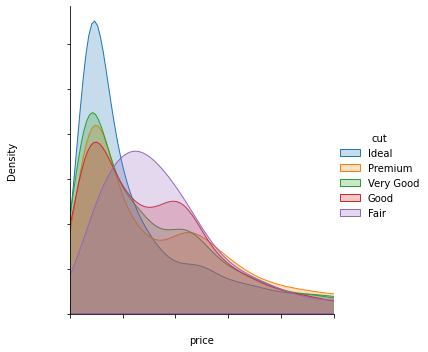

In [32]:
hist_denst = (sns.FacetGrid(df, hue = 'cut', height=5, xlim=(0, 10000)).map(sns.kdeplot, 'price', shade = True).add_legend())
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

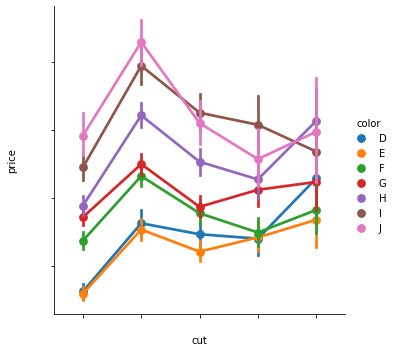

In [33]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

### Boxplot

In [34]:
import seaborn as sns

tips = sns.load_dataset('tips')
df = tips.copy()

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [37]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [38]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

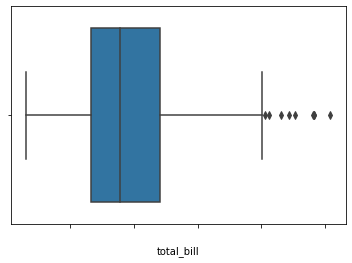

In [39]:
sns.boxplot(x=df['total_bill'])
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

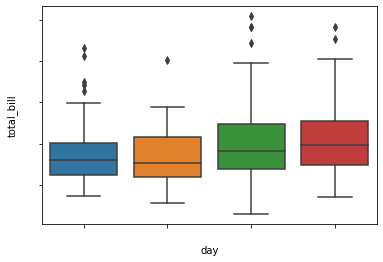

In [40]:
# crossover for boxplot:

sns.boxplot(x = 'day', y = 'total_bill', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

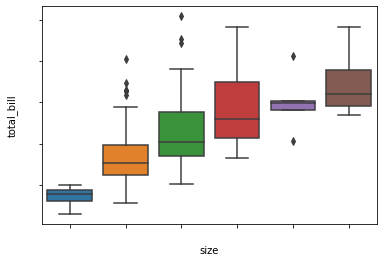

In [42]:
sns.boxplot(x = 'size', y = 'total_bill', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

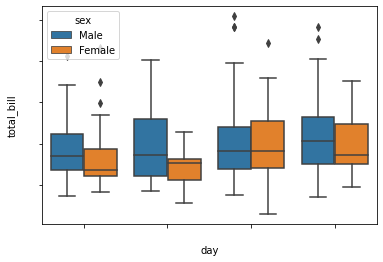

In [43]:
sns.boxplot(x = 'day', y = 'total_bill', hue = 'sex', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

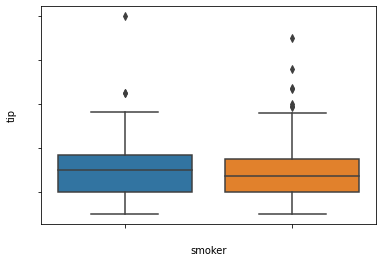

In [44]:
sns.boxplot(x = 'smoker', y = 'tip', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();

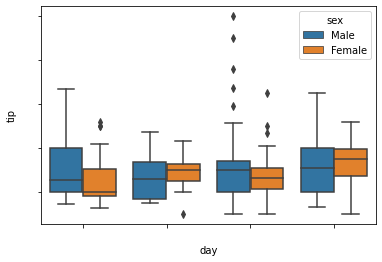

In [45]:
sns.boxplot(x = 'day', y = 'tip', hue = 'sex', data = df)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show();